# Uploading the datafile : NDAP_REPORT_7004.csv into the environment

In [1]:
# UPLOADING DATA FILE

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving NDAP_REPORT_7004.csv to NDAP_REPORT_7004.csv
User uploaded file "NDAP_REPORT_7004.csv" with length 184811 bytes


#Imports

In [2]:
# importing required python packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import math

# Reading the datafile into a pandas dataframe and displaying a few values

In [3]:
#reading the csv file
df = pd.read_csv('NDAP_REPORT_7004.csv')
# Displaying the first few and last few rows of the dataset
display(df)

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


# Printing the data type, the number of unique and null values present in each column

In [4]:
const_column = []
# Looping through all columns
for col in df.columns.values:
  # Array list_vals for storing all the unique values of the current column 
  list_vals = pd.unique(df[col])
  if(len(list_vals) == 1):
    # Appending the column name into a array for storing all the constant data columns
    const_column.append(col)

# Preprocessing the dataset

In [5]:
# Removing all the constant columns
for col in const_column:
  # Using del to remove the column 
  del df[col]

Deleting useless columns

In [6]:
# Deleting the Rowid column because Pandas already keeps tracks of the current row number
del df["Rowid"]

Cleaning all numeric columns to their correct datatype

In [7]:
# Some columns are having float values but have data type object because some entries have 'zero' instead of 0
# Changing 'Number of census houses' column to float64 datatype 
df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses'])
# Changing 'Houses having grass or thatch or bamboo etc. as material of wall' column to float64 datatype 
df['Houses having grass or thatch or bamboo etc. as material of wall'] = pd.to_numeric(df.replace({'Houses having grass or thatch or bamboo etc. as material of wall' : {'zero':0}})['Houses having grass or thatch or bamboo etc. as material of wall'])
# Changing 'Houses having plastic or polythene as material of wall' column to float64 datatype 
df['Houses having plastic or polythene as material of wall'] = pd.to_numeric(df.replace({'Houses having plastic or polythene as material of wall' : {'zero':0}})['Houses having plastic or polythene as material of wall'])

In [8]:
# Printing the datatype all the 'cleaned' columns
df.dtypes

State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                             float64
Houses having plastic or polythene as material of wall                                       float64
Houses having mud or unburnt brick as material of wall                                       float64
Houses having wood as material of wall                                                     

# Dividing columns J through S by column I and storing in new columns as percent (multiply by 100) 

In [9]:
# Creating a new dataframe containing the columns J to S (all columns after I, 'Number of census houses')
new_df = df.iloc[:, 6:].copy()
# Looping through all the columns of the copied dataframe
for i in range(6, df.shape[1]):
  # New Column = (Old Column * 100)/ Column I (df.iloc[:, 5])
  new_df.iloc[:, (i - 6)] = (df.iloc[:, i]*100)/df.iloc[:, 5]
# Displaying the new dataframe
display(new_df)

,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,0.156825,0.197484,8.384931,1.122173,0.874737,0.357794,0.250921,85.718435,1.184903,1.751798
3,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,0.341459,0.143817,15.964869,2.682891,10.433304,4.554696,1.446491,60.415171,1.760565,2.256736
...,...,...,...,...,...,...,...,...,...,...
1468,0.476955,0.354175,1.005856,0.224311,0.170004,0.436815,0.306951,92.463166,4.549962,0.011806
1469,0.110906,0.000000,0.924214,0.036969,4.399261,94.158965,0.000000,0.036969,0.092421,0.240296
1470,0.208373,0.018943,0.113658,0.000000,3.125592,91.305171,0.208373,2.784618,2.197386,0.037886
1471,46.396295,0.175102,13.948825,0.409512,0.319137,0.208992,0.271125,35.703796,2.533326,0.033891


In [10]:
# Storing the Houses having mud or unburnt brick as material of wall into data variable
data = new_df["Houses having mud or unburnt brick as material of wall"]

# Q-Q plot for Gaussian and Uniform distributions 

QQ plot for the Gaussian distribution


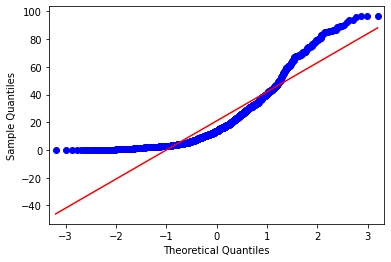

----
QQ plot for the Uniform distribution


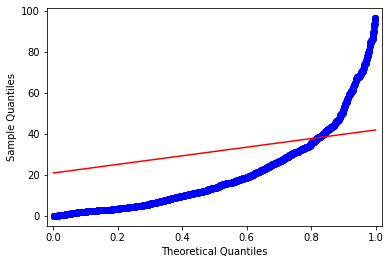

----


In [11]:
# Using the statsmodel api for displaying the QQ plot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
print("QQ plot for the Gaussian distribution")
# QQ plot for gaussian distribution
sm.qqplot(data.dropna(),norm, line="s")
plt.show()
# Seperating each plot by a line
print("----")
# 
print("QQ plot for the Uniform distribution")
# QQ plot for uniform distribution
sm.qqplot(data.dropna(),uniform, line="s")

plt.show()

print("----")



# Reference : https://www.yourdatateacher.com/2021/06/21/how-to-use-q-q-plot-for-checking-the-distribution-of-our-data/

From observing the QQ plots for Gaussian and Uniform Distributions, we can say that Gaussian is a better fit as the uniform plot is far from fitting

# MLE parameter estimates for Gaussian distribution
$p_{\mu, \sigma} = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2} \big(\frac{x - \mu}{\sigma} \big)^2}$ 

$\mu = \frac{1}{N} \times \sum_{i} x_i$ (mean)

$\sigma = \sqrt{\frac{\sum_i (x_i - x)^2}{N}}$ (standard deviation)

In [12]:
# Mean of data 
mu = data.mean()
# Standard deviation of data
sigma = data.std()*data.std()
print("MLE estimate of mean : " + str(mu))
print("MLE estimate of Standard deviation : " + str(data.std()))

MLE estimate of mean : 20.95141239680236
MLE estimate of Standard deviation : 20.995359141637177


# MLE parameter estimates for Uniform distribution

$p_{a,b}(x) = \begin{cases}
  \frac{1}{b-a} & a \leq x \leq b \\
  0 & \text{otherwise}
 \end{cases}$

 a = min($x_i$)  
 b = max($x_i$)

In [13]:
# Minimum value of data
a = data.min()
# Maximum value of data
b = data.max()
print("MLE estimate of a : " + str(a))
print("MLE estimate of b : " + str(b))


MLE estimate of a : 0.0
MLE estimate of b : 96.46082059155783


In [14]:
number_of_samples = len(data)
print("Number of samples in dataset : " + str(number_of_samples))

Number of samples in dataset : 1473


# Comparing Log Likelihoods
Log likelihood l(x) of Uniform Distribution = -nlog(b-a)  
Log likelihood l(x) of Normal Distribution = $-\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_i(x_i - \mu)^2$

In [15]:
# log likelihood for uniform distribution using the formula specified above
log_likelihood_uniform = -number_of_samples*(b - a)
print("Log Likelihood of Uniform Distribution : " + str(log_likelihood_uniform))

Log Likelihood of Uniform Distribution : -142086.78873136468


In [16]:
# log likelihood for gaussian distribution using the formula specified above
import math
log_likelihood_normal = -(number_of_samples*(math.log(2*math.pi) + math.log(sigma))/2) - ((((data - mu)**2).sum())/(2*sigma))

print("Log Likelihood of Normal Distribution : " + str(log_likelihood_normal))

Log Likelihood of Normal Distribution : -6556.35245113742


Since log likelihood of normal distribution is greater than that of uniform distribution  
$\Pi_i p_{normal}(x_i) > \Pi_i p_{uniform}(x_i)$  
Hence Gaussian distribution is more likely to
explain the observed data 

# Question 2

p(x) = $\begin{cases} 
  1 - |x| & |x| \leq 1 \\
  0 & otherwise
\end{cases}$

QQ plot using a discrete approximation of the continuous function

In [17]:
# using rv_discrete class from scipy stats for getting an approximate distribution of the given 
from scipy.stats import rv_discrete
# Creating sample input using linspace which returns evenly spaced numbers over a specified interval.
x = np.linspace(-5, 5, 10000)
# Function for the IQ funciton
def IQ(x, scale=1, shift=1):
  # probability value array using np.where which result the second argument if the first argument is true 
  p = np.where((abs(x) <= 1), (1 - abs(x)), 0)
  # Normalizing p values such that sum of probabilites is 1
  p_new = p/np.sum(p)
  # Creating the approximate distribution using sample input and output values
  return rv_discrete(name="custom", values=(x, p_new))

# Freezing the distribution
custom_dist = IQ(x)
# Reference = https://github.com/scipy/scipy/issues/11132

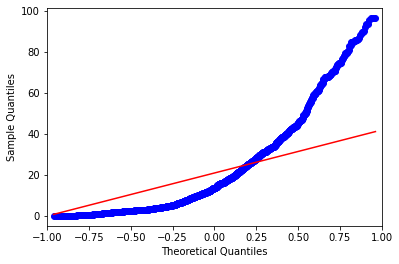

----


In [18]:
# QQ plot for the given dataset (Houses having mud or unburnt brick)
sm.qqplot(data.dropna(),custom_dist, line="s")

plt.show()

print("----")

Continuous distribution
We are required to create a function for finding the ppf - Percent point function (inverse of cdf) such that we can plot an accurate QQ plot  
PPf is the inverse of cdf  
Find a such that  (since x is between -1 and 1 ,so is a)
$\begin{align} 
  y &= \int_{-\infty}^{a}p(x)dx \\
  & \text{If 1 < a < 0} \\
  y &= \int_{-1}^{a}(1  + x)dx \\
  y &= a + 0.5a^2 + 1 \\
  a &= \sqrt{2y} - 1  \tag{1} \\
  & \text{The above equation is true if $0 \leq y \leq 0.5$ } \\
  & \text{Now if 1 > a > 0} \\
  y &= \int_{-1}^{0}(1  + x)dx + \int_{0}^{a}(1  - x)dx \\
  y &= 0.5 + a - 0.5a^2 \\
  a &= 1 - \sqrt{2 -2y} \tag{2} \\
  & \text{The above equation is true if $0.5 \leq y \leq 1$} \\
\end{align}$

The two a values define the ppf function for each y

In [19]:
# Creating a continuous distibution by inheriting the rv_continuous class
from scipy.stats import rv_continuous
# Class for creating the distribution
class iq_generator(rv_continuous):
    "Custom distribution"
    # Function for the pdf
    def _pdf(self, x):
      return (1 - abs(x)) if abs(x) <= 1 else 0
    # Percent point function (inverse of cdf)
    def _ppf(self, x):
      # Checking if the input is an array of a single values such as float or int
      if(isinstance(x, (float, int))):
        # Returning the ppf value for the corresponding y value using equations (1) and (2) in the above paragraph
        return (math.sqrt(2*x) - 1) if (x >= 0 and x <= 0.5) else (-1*math.sqrt(2 - 2*x) + 1)
      else:
        # If the input is an array
        # return np.where(np.logical_and( x >= 0, x <= 0.5), math.sqrt(2*x) - 1, -1*math.sqrt(2 - 2*x) + 1)
        output = []
        # Loop through the array of input percentiles
        for x in x:
          if(x >= 0 and x <= 0.5):
            # Append the ppf values into the output array
            output.append((math.sqrt(2*x) - 1))
          else:
            # Append the ppf values into the output array
            output.append((-1*math.sqrt(2 - 2*x) + 1))
        return output
        
 # Defining the Continuous distribution        
custom = iq_generator(name='custom')

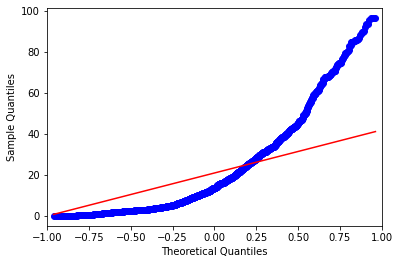

----


In [20]:
# QQ plot using the Continuous distribution 
sm.qqplot(data.dropna(),custom, line="s")

plt.show()

print("----")

Comparing the QQ plots of discrete and continuous definitions we can say that the discrete approxmation for the distribution is a very good approximation

# Parameterizing the IQ funciton
let shift = b and scale = a  
For shifting p(x) becomes p(x - b)  
For scaling p(x) becomes p(ax)  
Hence the after shifting and scaling p(x) shoukd be p(a*(x - b))   
Hence new p(x) = $\lambda(1 - |a*(x - b)|)$   
Here lambda is present for keeping Area = 1  
Since $0 \leq p(x) \leq 1$  (probability is between 0 and 1)   
$\lambda(1 - |a*(x - b)|) > 0$  
$b - \dfrac{1}{a} \leq x \leq b + \dfrac{1}{a} $   
Area = 1,  
$\int_{b - \frac{1}{a}}^{b + \frac{1}{a}}p(x) = 1$  
$\lambda \big(\int_{b - \frac{1}{a}}^{b + \frac{1}{a}} (1 - |a*(x - b)|)dx \big) = 1$  
$\lambda = a$  
For $0 \leq p(x) \leq 1 , 0 < a \leq 1 $ 
Hence,  
p(x) = $\begin{cases}
a*(1 - |a*(x - b)|) & b - \dfrac{1}{a} \leq x \leq b + \dfrac{1}{a} \\
0 & otherwise
\end{cases}
$

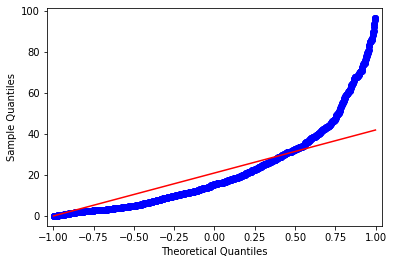

----


In [21]:
# Defining a function for discrete approximation of the parameterized distribution
def IQ_param(x, **kwargs):
  # Scale variable
  a = kwargs["scale"]
  # Shift Variable
  b = kwargs["shift"]
  # Parameterized IQ function as defined in the above paragraph 
  p = np.where((abs(x) <= 1), (1 - abs(a*x - b))*a, 0)
  # Normalizing the p values since their sum is required to be zero
  p_new = p/np.sum(p)
  return rv_discrete(name="custom", values=(x, p_new))

# Creating a evenly spaced custom input ranging from -5 to 5
x = np.linspace(-5, 5, 10000)
# Parameterized IQ function with shift 10 and scale 1
custom_dist2 = IQ_param(x, shift = 10, scale = 1)
# QQ plot for the Parameterized IQ function 
sm.qqplot(data.dropna(),custom_dist2, line="s")

plt.show()

print("----")

As observed from the above QQ plot, if we shift the distribution to 10 and scale by 1(no scaling), then the new parameterized IQ function is more likely to
explain the observed data.

# MLE estimates for the IQ function

let shift = b and scale = a 

Likelihood function L(x) = $\Pi_{i=1}^n p(x_i)$  
$L(a, b, x_1, x_2 \dots x_n) = a^n*(1 - |a(x - b)|)$  
Log likelihhod $l(a, b, x_1, x_2 \dots x_n) = nlog(a) + \sum_{i}^n(log(1 - |a(x - b)|))$  
Take partial derivatives w.r.t a and b and equate them to zero  
$\displaystyle \frac{\partial l}{\partial a} = \frac{n}{a} + \sum_{i=1}^n \frac{|x_i - b|}{1 - |a(x - b)|} = 0$

$\displaystyle \frac{\partial l}{\partial b} = \sum_{i=1}^n \frac{(x_i - b)}{(1 - |a(x - b)|)*(|x_i - b|)} = 0$

Finding closed form solution for a and b will give us the MLE estimates for the IQ function.

However finding the closed form solution is not easy in this case

We can find the log likelihood for the parameterized IQ function and minimize its value with respect to a and b as the MLe parameters

In [34]:
# optimized using scipy 
import scipy.optimize as opt
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize
# Function for finding the log likelihood
def IQ_logL(parameters, data):
  # Size of dataset
  N = len(data)
  # The reason we use log-transformed parameters is to avoid the potential errors due to 
  # invalid values placed in the logarithms of IQ_logL function during the optimization process.
  a,b = np.exp(parameters)
  # First term of the log likelihood 
  logL = N*np.log(a)
  # Looping through all dara values
  for x in data:
    # Function exists only between b +- a
    if( (x > (b - 1/a)) and (x < (b + 1/a)) ):
      # Summing the log likehood values for each data point
      logL = logL + (np.log(1 - np.abs(a*(x - b))))
  # Returning the negative log likelihood
  return -logL

# Defining a function for finding the Maximum Likelihood Estimates for the given input data into the parameterized IQ function
def IQ_mle(data):
  # Using minimize from the scipy library for finding MLE estimates of a and b with itheir initial values being a =  e^{-0.6} ~ 0.54
  # and b = e^{0.1} = 1.1 and using Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm for minimizing the log likelihood
    res = opt.minimize(
  # Lambda (anonymous) function used for creating the log likelihood function
    fun=lambda parameters, data: IQ_logL(parameters, data),
    # initial values of a and b set
    x0=np.array([-0.6, 0.10]), args=(data,), method='BFGS')
    # the parameters returned are log transformed here
    a,b = np.exp(res.x)
    return a,b
# Reference =  https://python.plainenglish.io/scipy-has-failed-you-do-maximum-likelihood-estimation-by-yourself-34145d71b63f

# PPF of parameterized IQ function

let shift = b and scale = a 

$\begin{align} 
  y &= \int_{-\infty}^{a}p(x)dx \\
  & \text{If b- 1/a < a < b } \\
  y &= \int_{b- 1/a}^{a}(1  + a(x-b)dx \\
  a &= \frac{(\sqrt{2y} - 1 + ab)}{a}  \tag{3} \\
  & \text{The above equation is true if $0 \leq y \leq 0.5$ } \\
  & \text{Now if b+1/a > a > b} \\
  y &= \int_{b- 1/a}^{b}(1  + a(x-b))dx + \int_{b}^{b + 1/a}(1  - a(x-b))dx \\
  a &= \frac{(1 + ab - \sqrt{2 -2y})}{a} \tag{4} \\
  & \text{The above equation is true if $0.5 \leq y \leq 1$} \\
\end{align}$

In [35]:
# Finding the ppf function for the parameterized IQ function
def IQ_ppf(p, a, b):
  # Output array for input array of quantiles
  output = []
  # Looping through the array of quantiles
  for x in p:
    # If the element is between 0 and 0.5
    if( x >= 0 and x <= 0.5):
      # Using equation 3 defined in the above paragraph
      output.append((math.sqrt(2*x) - 1 + a*b)/a)
      # If the element is between 0.5 and 1
    elif ( x > 0.5 and x<= 1 ):
      # Using equation 4 defined in the above paragraph
      output.append((1 + a*b - math.sqrt(2 - 2*x))/a)
  return output

In [36]:
import scipy.stats as st
# Creating a custom input using the uniform distribution between 0 and 1 (for the quantiles input to the ppf function)
x = st.uniform.rvs(0, 1, 20000)
# PPF output
y = np.array(IQ_ppf(x, 0.7, 2.2))

In [37]:
# Finding the MLE estimates of a and b for the custom input using a = 0.7 and b = 2.2
IQ_mle(y)

(0.701488564842813, 2.202419671280961)

In [26]:
# Finding the MLE estimates of a and b for the custom input using a = 0.4 and b = 1
y = np.array(IQ_ppf(x, 0.4, 1))
IQ_mle(y)

(0.5486380655030216, 1.1277060069536173)

As we observed when (a, b) was (0.7, 2.2) , the output MLE estimates (0.704, 2.2024) are very close to the real parameters  
As we observed when (a, b) was (0.4, 1) , the output MLE estimates (0.548, 1.12) are approximately close to the real parameters   
Hence the defined MLE function is accurate enough

In [27]:
# Defining the log likelihhod function given a data but we not know the input a and b values
def IQ_log_likelihood(data):
  # Finding the approximate and b values using the defined MLE function
  a, b = IQ_mle(data)
  # Length of dataset
  N = len(data)
  # First term of the log likelihood
  logL = N*np.log(a)
  # Looping through the data and using the MLE estimates of and b values
  for x in data:
    if( (x > (b - 1/a)) and (x < (b + 1/a)) ):
      logL = logL + (np.log(1 - np.abs(a*(x - b))))
  return logL


In [28]:
IQ_log_likelihood(data.dropna())

-40.68840027286716

# Question 3

In [44]:
# Creating a new dataframe using columns Houses having mud or unburnt , Type of residence namely rural or urban and District code
data_Q3 = pd.concat([new_df["Houses having mud or unburnt brick as material of wall"], df["Type of residence namely rural or urban"], df["District lgd code"]], axis = 1)
data_Q3.head()

,Houses having mud or unburnt brick as material of wall,Type of residence namely rural or urban,District lgd code
0,20.746357,Rural,1
1,20.306068,Urban,1
2,8.384931,Rural,2
3,7.117844,Urban,2
4,15.964869,Rural,3


For the first part of this quesiton the comparing he sum of the percentages of rural vs urban would be suffient enough to prove that urban residenies have houses made up of mud and unburnt bricks

In [75]:
# Fincing all the houses with rural residencies using .loc function
rural_mud = data_Q3.loc[data_Q3['Type of residence namely rural or urban'] == "Rural", "Houses having mud or unburnt brick as material of wall"]
# Fincing all the houses with urban residencies using .loc function
urban_mud = data_Q3.loc[data_Q3['Type of residence namely rural or urban'] == "Urban", "Houses having mud or unburnt brick as material of wall"]
print("Total number of RURAL houses having mud or unburnt brick : " + str(rural_mud.sum()))
print("Total number of URBAN houses having mud or unburnt brick : " + str(urban_mud.sum()))


Total number of RURAL houses having mud or unburnt brick : 20664.545057578038
Total number of URBAN houses having mud or unburnt brick : 9463.585969023758


Since the sum of rural houses is more, we can say that percent of houses across districts with “mud or unburnt brick” is really larger for
rural versus urban in the housing data.

In [76]:
# Statistics for the rural houses with mud or unburnt bricks
rural_mud.describe()

count    728.000000
mean      28.385364
std       24.602573
min        0.030124
25%        6.897108
50%       22.429310
75%       42.664508
max       96.460821
Name: Houses having mud or unburnt brick as material of wall, dtype: float64

In [77]:
# Statistics for the rural houses with mud or unburnt bricks
urban_mud.describe()

count    710.000000
mean      13.328994
std       12.563507
min        0.000000
25%        3.670793
50%        9.581809
75%       19.527729
max       89.736544
Name: Houses having mud or unburnt brick as material of wall, dtype: float64

Since all the statistics (count, mean, standard deviation, max, quaetiles) are greater for rural houses, we can definitely say that percent of houses across districts with “mud or unburnt brick” is really larger for
rural versus urban in the housing data.

In [86]:
# Finding all the unique districts
districts = pd.unique(data_Q3["District lgd code"])
# Array for storing the sum of the percentage values Houses having mud or unburnt brick corresponding to each district in rural
rural_district_sums = []
# Array for storing the sum of the percentage values Houses having mud or unburnt brick corresponding to each district in urban
urban_district_sums = []
for district in districts:
  # Finding all the values with the current district
  district_data = data_Q3.loc[data_Q3["District lgd code"] == district]
  # Storing the sum of the houses having mud or unburnt brick in rural
  rural_sum = district_data.loc[district_data['Type of residence namely rural or urban'] == "Rural", "Houses having mud or unburnt brick as material of wall"].sum()
  rural_district_sums.append(rural_sum)
  # Storing the sum of the houses having mud or unburnt brick in urban
  urban_district_sums.append(district_data["Houses having mud or unburnt brick as material of wall"].sum() - rural_sum)

Finding the percentage of urban and rural houses in each district

In [103]:
df2 = pd.DataFrame(np.transpose([districts, rural_district_sums, urban_district_sums]), columns=["District Name", 'Rural Sums', 'Urban Sums'])
df2["Percentage Rural"] = df2["Rural Sums"] / (df2["Rural Sums"] + df2["Urban Sums"])
df2["Percentage Urban"] = df2["Urban Sums"] / (df2["Rural Sums"] + df2["Urban Sums"])
df2

,District Name,Rural Sums,Urban Sums,Percentage Rural,Percentage Urban
0,1.0,20.746357,20.306068,0.505363,0.494637
1,2.0,8.384931,7.117844,0.540866,0.459134
2,3.0,15.964869,14.729570,0.520123,0.479877
3,4.0,4.367594,7.086093,0.381326,0.618674
4,5.0,10.070516,2.956932,0.773023,0.226977
...,...,...,...,...,...
732,6.0,42.118897,39.638989,0.515166,0.484834
733,9.0,59.006169,89.736544,0.396700,0.603300
734,463.0,3.596730,1.005856,0.781459,0.218541
735,464.0,0.924214,0.113658,0.890490,0.109510


In [154]:
# Statis for rural and urban sums and percentage for each district
df2[["Rural Sums", "Urban Sums", "Percentage Rural", "Percentage Urban"]].describe()

,Rural Sums,Urban Sums,Percentage Rural,Percentage Urban
count,737.000000,737.000000,735.000000,735.000000
mean,28.038731,12.840687,0.657605,0.342395
std,24.649895,12.582926,0.168382,0.168382
min,0.000000,0.000000,0.000000,0.000000
25%,6.561230,3.314167,0.590493,0.249222
50%,22.001260,9.119509,0.682118,0.317882
75%,42.421742,18.956448,0.750778,0.409507
max,96.460821,89.736544,1.000000,1.000000


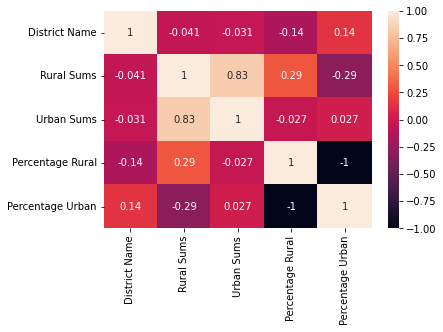

In [109]:
ax = sns.heatmap(df2.corr(), annot=True)

From the correlation matrix we can say that rural and urban sums are correlated (0.83 correlation) 

QQ plot for the Gaussian distribution of Rural Sums


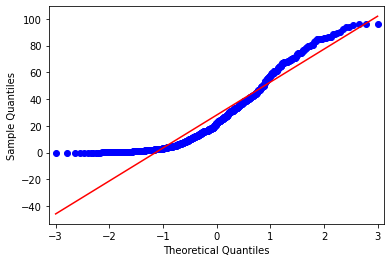

----
QQ plot for the Uniform distribution of Rural Sums


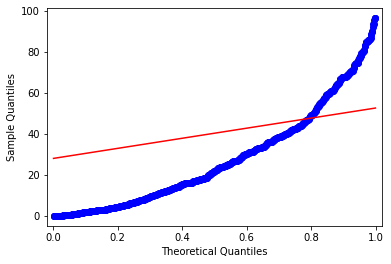

----
QQ plot for the Gaussian distribution of Urban Sums


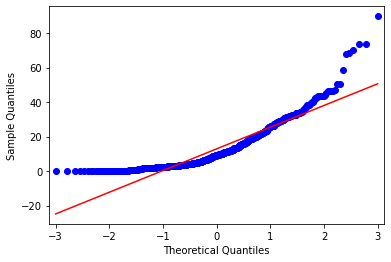

----
QQ plot for the Uniform distribution of Urban Sums


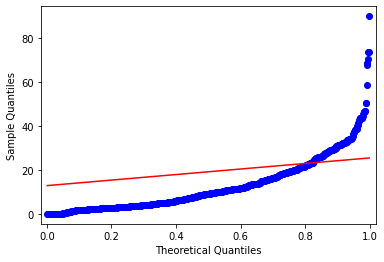

----
QQ plot for the Gaussian distribution of Percentage Rural


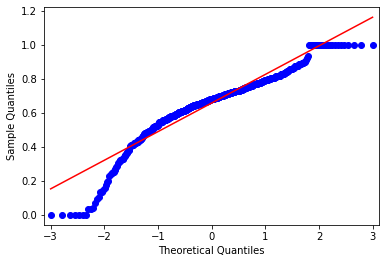

----
QQ plot for the Uniform distribution of Percentage Rural


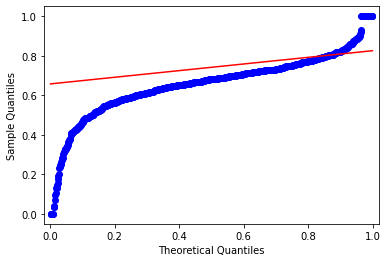

----
QQ plot for the Gaussian distribution of Percentage Urban


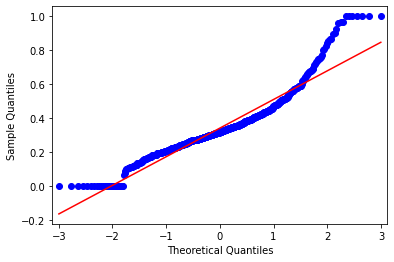

----
QQ plot for the Uniform distribution of Percentage Urban


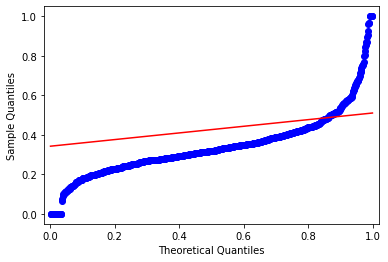

----


In [113]:

# QQ plot
for cols in df2.columns.values:
  if cols == "District Name":
    continue
  print("QQ plot for the Gaussian distribution of " + cols)
  sm.qqplot(df2[cols].dropna(),norm, line="s")
  plt.show()
  # Seperating each plot by a line
  print("----")

  print("QQ plot for the Uniform distribution of " + cols)
  # QQ plot
  sm.qqplot(df2[cols].dropna(),uniform, line="s")

  plt.show()

  print("----")

From the QQ plots we can say that, all the columns can be better desbribed using the Gaussian distribution excluding thier initial and end values

In [114]:
# UPLOADING DATA FILE Automobile Data

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Automobile_data.csv to Automobile_data.csv
User uploaded file "Automobile_data.csv" with length 24864 bytes


In [115]:
#reading the Automobile csv file
df_auto = pd.read_csv('Automobile_data.csv')
# Displaying the first few and last few rows of the dataset
display(df_auto)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [130]:
# body_style and drive_wheel data contains categorical data, we must encode it to numbers before we can fit and evaluate a model.
from sklearn.preprocessing import OrdinalEncoder
# In ordinal encoding, each unique category value is assigned an integer value.
# For example, “red” is 1, “green” is 2, and “blue” is 3. 
encoder = OrdinalEncoder()
body_style = (encoder.fit_transform(df_auto["body-style"].values.reshape(-1,1)) + 1)
drive_wheel = (encoder.fit_transform(df_auto["drive-wheels"].values.reshape(-1,1)) + 1)
body_style = body_style.flatten()
drive_wheel = drive_wheel.flatten()
# Reference : https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

In [146]:
ordinal_df = pd.DataFrame(data = np.transpose([body_style, drive_wheel]),  
                  columns = ["Body style", "Drive Wheel"])
ordinal_df[["Body style", "Drive Wheel"]].describe()

,Body style,Drive Wheel
count,205.000000,205.000000
mean,3.614634,2.326829
std,0.859081,0.556171
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,2.000000
75%,4.000000,3.000000
max,5.000000,3.000000


Boxplot for checking if there are any outlier and no such outpliers are visible

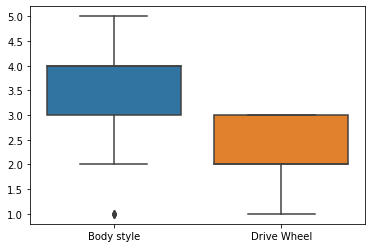

In [147]:
sns.boxplot(data=ordinal_df[["Body style", "Drive Wheel"]], orient="v")

In [131]:
# Finding the correlation between the two columns
print(np.corrcoef(drive_wheel, body_style))

[[ 1.         -0.15574477]
 [-0.15574477  1.        ]]


Correlation is very low means that the two  variables have a weak linear relationship with each other

In [138]:
# Linear regression using scipy
st.linregress(np.array([drive_wheel, body_style]).T)

LinregressResult(slope=-0.2405689548546687, intercept=4.174397031539888, rvalue=-0.155744772870327, pvalue=0.025753064536771206, stderr=0.10708926326921725, intercept_stderr=0.2561639470334383)

Linear regression output says that values are not closely related , p value is very low

Welch test

In [141]:
mean1 = np.mean(drive_wheel)
mean2 = np.mean(body_style)
std1 = np.std(drive_wheel)
std2 = np.std(body_style)
n = len(drive_wheel)
t = (mean1 - mean2)/math.sqrt((std1**2 + std2**2)/n)
DOF = ((std1**2 + std2**2)/n)**2/((std1**4 + std2**4)/(n**2 * (n - 1)))
print("Welch's test t value : " + str(t))
print("Degrees of freedom : " + str(DOF))

Welch's test t value : -18.061083570096994
Degrees of freedom : 349.4530470082811


Very high value of t value (higher than t critical ), which means their means are not related

In [142]:
# Wilcoxon signed rank test
st.wilcoxon(drive_wheel, body_style)

WilcoxonResult(statistic=1026.0, pvalue=1.9277315929313906e-26)

Very low value of the pvalue mean that we reject the null hypothesis and believe the alternate hypothesis that reject the idea that the difference is a due to chance and conclude instead that the variablrs have a median distinct meaning variable are different

# Warning the following code does not work and is kept for stuff that did not work during the assignment

In [ ]:
from scipy.stats import rv_continuous
import warnings

from scipy.integrate import simps
from scipy.interpolate import interp1d

# some config
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
# class custom_gen(rv_discrete):
#     "Custom distribution"
#     def _pmf(self, x):
#         if(abs(x) <= 1):
#           return 0.75*(1 - x**2)
#         else:
#           return 0

# custom_rv = custom_gen(name="custom_rv")


# define our gaussian look-a-like distribution
class cust_dist(rv_continuous):
    
    # define init with sigma deviation param e
    def __init__(self, e, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # init our variance divergence
        self.e = e
        self.name = kwargs['name']
        # init our cdf and ppf functions
        self.cdf_func, self.ppf_func = self.create_cdf_ppf()
        
    # function to return normal distribution pdf
    def norm_p(self, x):
          return 0.75*(1 - x**2)
        
    # function to normalise the pdf over chosen domain
    def normalisation(self, x):
        return simps(self.pdf(x), x)
    
    # function to
    def create_cdf_ppf(self):
        # define domain as +/-25 sigma
        xs = np.linspace(-5, 5, 1000)
        # normalise our pdf to sum to 1 so it satisfies a distribution
        norm_constant = self.normalisation(xs)
        # compute pdfs to be summed to form cdf
        my_pdfs = np.where((abs(xs) <= 1), self.pdf(xs) / norm_constant, 0)
        # cumsum to form cdf
        my_cdf = np.cumsum(my_pdfs)
        # make sure cdf bounded on [0,1]
        my_cdf = my_cdf / my_cdf[-1]
        # create cdf and ppf
        func_cdf = interp1d(xs, my_cdf)
        func_ppf = interp1d(my_cdf, xs, fill_value='extrapolate')
        return func_cdf, func_ppf
        
    # pdf function for averaged normals
    def _pdf(self, x):
        # # define lower var distribution prob
        # low = self.norm_p(x, scale=(1 - self.e)**0.5)
        # # define higher var distribution prob
        # high = self.norm_p(x, scale=(1 + self.e)**0.5)
        return self.norm_p(x)
    
    # cdf function
    def _cdf(self, x):
        return self.cdf_func(x)
    
    # inverse cdf function
    def _ppf(self, q):
        return self.ppf_func(q)

custom_rv = cust_dist(0.1, name = "cust_dist")

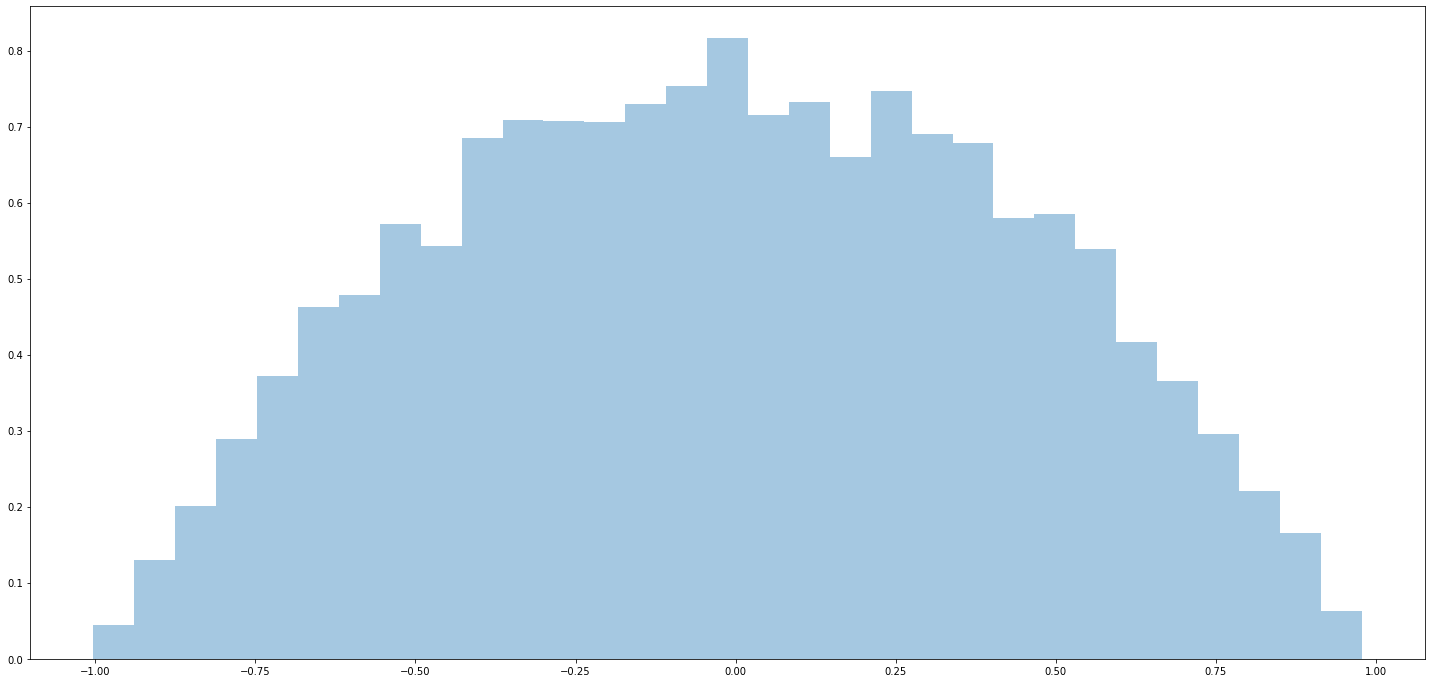

In [ ]:
n = 10000
cust_samps = custom_rv.rvs(size=n)
fig, ax = plt.subplots(ncols=1, figsize=(25,12))
sns.distplot(cust_samps, label='cust_samps', kde=False, norm_hist=True, ax=ax)

In [ ]:
sm.qqplot(data.dropna(),cust_dist, line="s")

plt.show()

print("----")

In [ ]:
y = np.linspace(-2, 2, 50)
a = 1
logL = len(IQ_sample)*np.log(a)
b = 0
z = []
for x in IQ_sample:
  if( (x > (b - 1/a)) and (x < (b + 1/a)) ):
    logL = logL + (np.log(1 - np.abs(a*(x - b))))
    z.append(logL)
print(z)

[-0.9527905376055835, -5.61712782828905, -8.483547145557793, -10.060549734155924, -11.820089994455543, -15.448316529453187, -20.13587086020098, -22.86745234564287, -26.11273324416856, -28.840294413618032, -31.175123197311635, -33.19130173706692, -36.06079018359372, -40.69532833389581, -43.837942656968266, -45.66395286048338, -47.49248597474029, -51.64686556545765, -56.49907913514836, -58.06981980472187, -61.692604179054015, -63.54540226421013, -66.06765882739742, -67.31069762567255, -69.33203454184985, -72.00678908586066, -74.22772112468135, -77.92168839577585, -79.04442638997276, -80.84823735492007, -82.31089664434312, -83.84711662786324, -85.7031369393569, -88.2045228558815, -90.15618410845681, -92.4915691330872, -96.42542374521774, -98.207745585236, -102.5410915879879, -104.29869595834414, -105.39662294828, -109.02827862840444, -110.83608693080353, -113.35619544557933, -114.74546360248804, -116.53170374041643, -118.82083692036767, -120.93710707457134, -124.79312976451308, -127.66171

In [ ]:
y

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])